<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli. Adapted for CS/MATH 3414 by Arash Sarshar. Shared under the same licenses.</td>
 <td> </td>
</table>

In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Numerical Quadrature

**Goal:** Evaluate integrals

$$ \int^b_a f(x) dx$$

using samples of the inegrand function $f(x_i)$. 

### Applications

- Many integrals do not have closed form solutions

$$ 
   \int^b_a \sqrt{1 + \cos^2 x}\, \text{d}x,
$$

- Solution to initial value problems
   
   $$
   \frac{\text{d} u}{\text{d}t} = f(u,t), \quad u(t=0) = u_0,
   $$
   which can be solved by integration
   
   $$
   u(t) = u_0 + \int^t_{t_0} f(u, \hat{t}) d\hat{t},
   $$
   
- Solving partial differential equations
$$
    u_t = \frac{\text{d}^2 u}{\text{d}x^2},
$$

### Basics of Quadrature

We want to approximate an integral $I$ with some approximation $I_N$ such that
$$
    I = \int^b_a f(x)\, \text{d}x \, \approx I_N = \sum^{N}_{i=1} w_i f(x_i)
$$
where the $x_i$ are the *quadrature points* or *nodes* and the $w_i$ are the *weights*.  Usually a particular quadrature rule specifies the points $x_i$ resulting in a particular set of weights $w_i$.

Convergence requires that
$$
    \lim_{N \rightarrow \infty} I_N = I.
$$

## Riemann Sums

Given $f(x)$ and a partition of the interval $[a,b]$ with $\{x_i\}^N_{i=0}$ and $a = x_0 < x_1 < \ldots < x_N = b$ and $x^*_i \in [x_i, x_{i+1}]$ we define the Riemann integral as

$$\int^b_a f(x) dx = \lim_{N\rightarrow \infty} \sum^{N-1}_{i=0} f(x_i^*) (x_{i+1} - x_i)$$

This is a general definition and leads to a number of quadrature approaches based on how we pick $x_i^* \in [x_i, x_{i+1}]$.

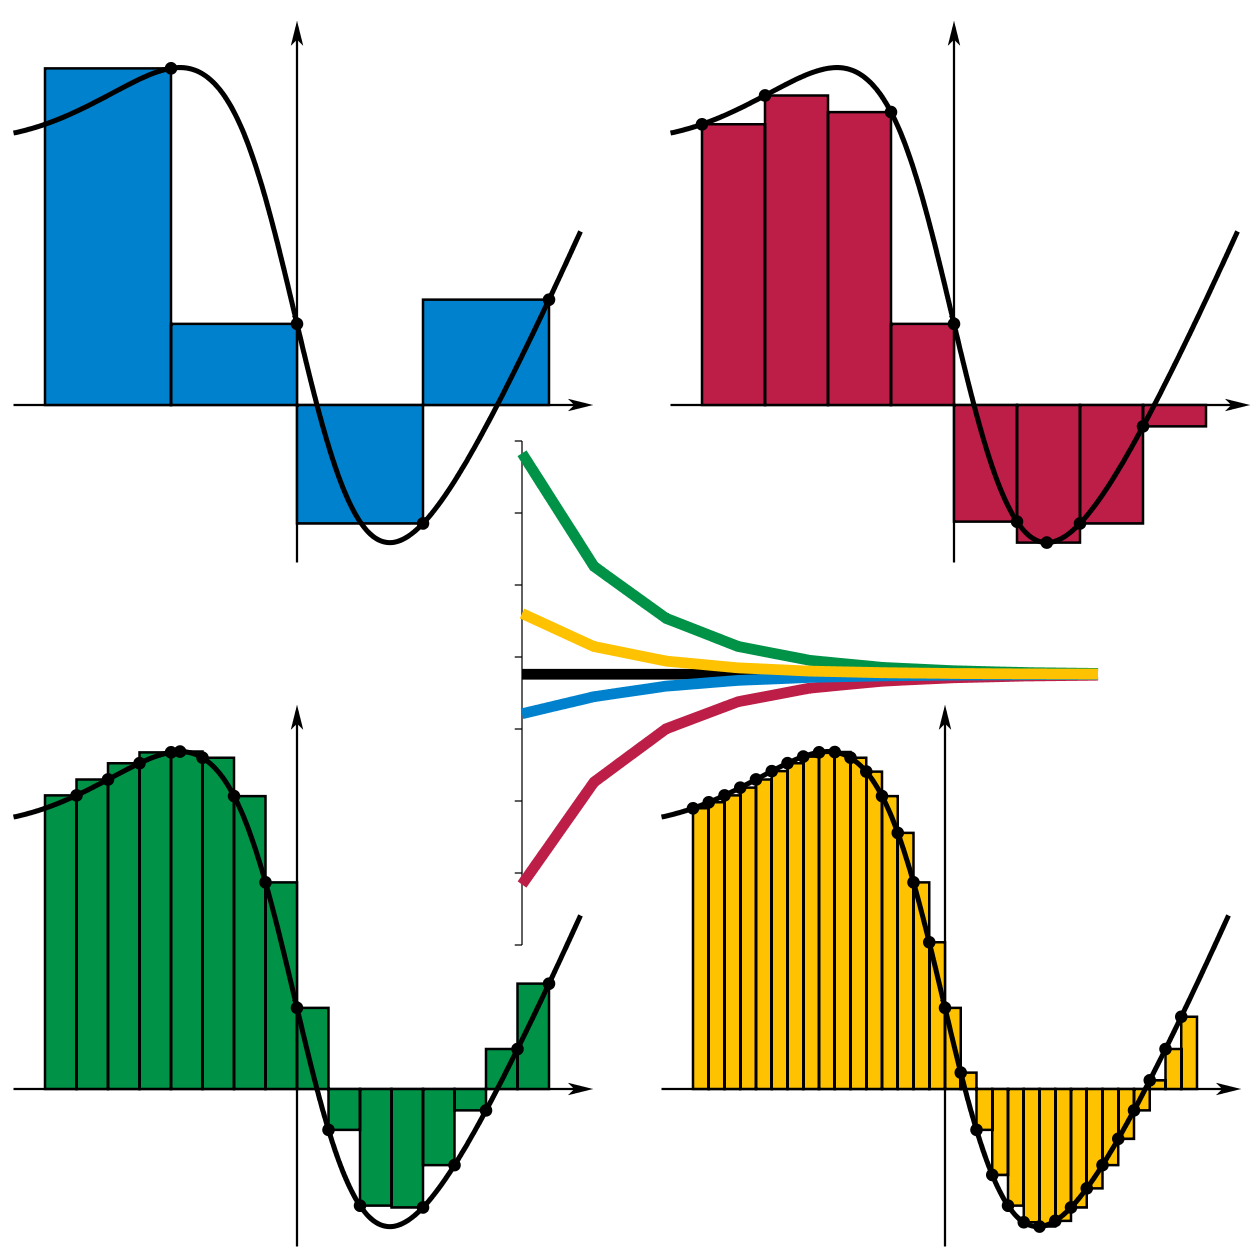
[https://commons.wikimedia.org/wiki/File:Riemann_sum_convergence.png]

### Midpoint Rule

Choose $x_i^* = x_i^* = \frac{x_{i+1} + x_i}{2},  \quad \Delta x_i = x_{i+1} - x_i,$

so that

$$I[f] = \int^b_a f(x) dx \approx \sum^{n-1}_{i=0} f\left(\frac{x_{i+1} + x_i}{2} \right ) (x_{i+1} - x_i) = I_n[f]\\[20pt].$$


#### Example:  Integrate using midpoint rule

Calculate and illustrate the midpoint rule.  Note that we are computing the cummulative integral here:

$$
    \int^x_0 sin(\hat{x}) d\hat{x} = \left . -\cos \hat{x} \right|^x_0 = 1 - \cos x
$$

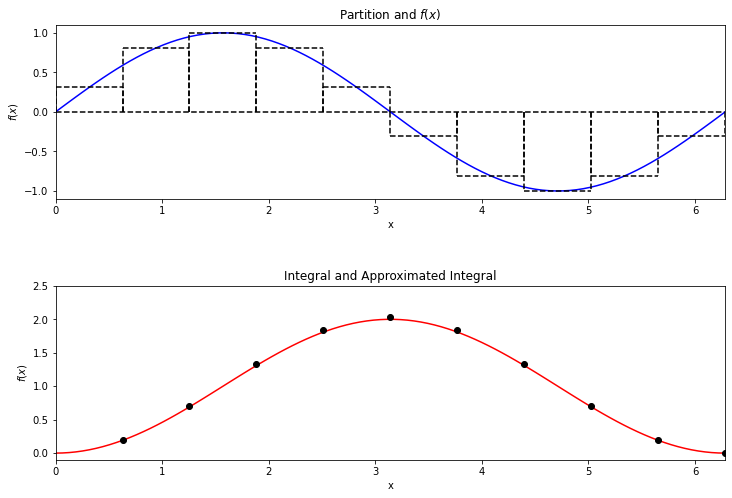

In [5]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_star[i]), f(x_star[i])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(x_star.shape)
I_hat[0] = f(x_star[0]) * delta_x
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + f(x_star[i]) * delta_x
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_star + delta_x / 2.0, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

### Newton-Cotes Quadrature

Using $N+1$ equally spaced points, evaluate $f(x)$ at these points and exactly integrate the interpolating polynomial:

$$I_n[f] = \int^b_a P_N(x) dx$$

#### Trapezoidal Rule

Using degree one polynomials gives us the trapezoidal rule (equivalently think of of piece-wise linear polynomial interpolation).  The coefficients of the polynomial in each interval are

$$
\begin{align*}
P_1^i &= p_0 + p_1 x, \\
p_0 &= f(x_i) , \quad \quad p_1 = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}= \frac{f(x_{i+1}) - f(x_i)}{\Delta x_i},
\end{align*}
$$

which gives the interpolating polynomial

$$P_1^i(x) = \frac{f(x_{i+1}) - f(x_i)}{\Delta x_i} ( x- x_i) + f(x_i).$$

Integrating this polynomial we have

$$\begin{aligned}
    I_\Delta[f] &= \int^{x_{i+1}}_{x_i} (p_0 + p_1 (x - x_i)) dx = \left . p_0 x + p_1 \left (\frac{x^2}{2} - x_i x\right) \right |^{x_{i+1}}_{x_i} \\
    &= p_0 \Delta x_i + p_1 \left (\frac{1}{2} (x_{i+1} + x_i) \Delta x_i - x_i \Delta x_i\right) \\
    &= f(x_i) \Delta x_i + (f(x_{i+1}) - f(x_i))\left (\frac{1}{2} (x_{i+1} + x_i) - x_i\right) \\
    &= f(x_i) \Delta x_i + (f(x_{i+1}) - f(x_i)) \frac{\Delta x_i}{2} \\
    & = \frac{\Delta x_i}{2} (f(x_{i+1}) + f(x_i))
\end{aligned}$$

If all intervals have the same length $\Delta x$  the entire sume becomes:

$$
    I_n[f] = \sum I_\Delta [f] = \frac{\Delta x}{2} (f(x_0) + f(x_N) ) + \sum^{n-1}_{j=0} \Delta x f(x_j)
$$

This is known as the composite trapezoidal rule.

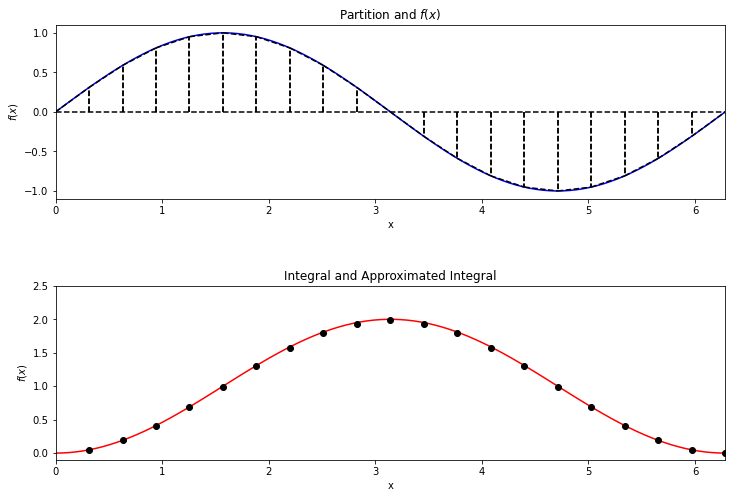

In [8]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 20
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i+1])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_hat[i]), f(x_hat[i+1])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = (f(x_hat[1]) + f(x_hat[0])) * delta_x / 2.0
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x / 2.0
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

#### Simpson's Rule

Simpson's rule uses degree 2  polynomials between each point (i.e. piece-wise quadratic polynomials on $\Delta x = x_{i+2}- x_{i}$).  

The polynomial has the form

$$P_2(x) = \frac{2 f(x_i)}{\Delta x^2} \left (x - \frac{\Delta x}{2} \right ) (x - \Delta x) - \frac{4 f\left(x_{i+2}\right)}{\Delta x^2}  x (x - \Delta x) + \frac{2 f(x_{i+1})}{\Delta x^2} x \left (x - \frac{\Delta x}{2} \right )$$

Integrating this polynomial we have

$$
    I_\Delta[f] = \int^{x_{i+2}}_{x_i} P_2(x) dx = \frac{\Delta x}{6} f(x_i) + \frac{2 \Delta x}{3} f\left(x_{i+1}\right ) + \frac{\Delta x}{6} f(x_{i+2})
$$

We can also show this by using the method of undetermined coefficients.  

Use the general form of the quadrature rule and determine weights $w_j$ by using functions we know the solution to.  These functions can be any representation of polynomials up to order $N=2$ however the monomials $1$, $x$, $x^2$ are the easiest in this case.

$$
 I_\Delta = \sum^{N}_{i=1} w_i f(x_i),
$$

$$
    I_{\Delta x}[f] = w_0 f(x_1 + 0) + w_1 f(x_1 + \Delta x / 2) + w_2 f( x_1 + \Delta x).
$$

$$\begin{aligned}
    &\text{if}~f = 1:  &I[f] =  \int^{\Delta x}_{0} 1 dx = \Delta x  \\
    &\text{if}~f = x:  &I[f] =  \int^{\Delta x}_{0} x dx = \frac{\Delta x^2}{2} \\
    &\text{if}~f = x^2:  &I[f] =  \int^{\Delta x}_{0} x^2 dx = \frac{\Delta x^3}{3}
\end{aligned}$$

What are the corresponding systems of equations?

$$\begin{aligned}
    &\text{if}~f = 1:  &I[f] =  \int^{\Delta x}_{0} 1 dx = \Delta x & & I_N[1] &= w_0 + w_1 + w_2 \\
    &\text{if}~f = x:  &I[f] =  \int^{\Delta x}_{0} x dx = \frac{\Delta x^2}{2} & & I_N[x] &= w_1 \frac{\Delta x}{2} + w_2\Delta x\\
    &\text{if}~f = x^2:  &I[f] =  \int^{\Delta x}_{0} x^2 dx = \frac{\Delta x^3}{3} & & I_N[x^2] &= \frac{\Delta x^2}{4} w_1 + w_2\Delta x^2\\
\end{aligned}$$

We then have the system of equations:
$$\begin{aligned}
    w_0 &+& w_1 &+& w_2 &=\Delta x \\
        &\quad& \frac{\Delta x}{2} w_1 &+& \Delta x w_2  &= \frac{\Delta x^2}{2} \\
        &\quad& \frac{\Delta x^2}{4} w_1 &+& \Delta x^2 w_2 &=\frac{\Delta x^3}{6} \\
\end{aligned}$$

or

$$\begin{bmatrix}
    1 & 1 & 1 \\
    0 & \Delta x / 2 & \Delta x \\
    0 & \Delta x^2 / 4 & \Delta x^2 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x^2 / 2 \\ \Delta x^3 / 3
\end{bmatrix} \Rightarrow \begin{bmatrix}
    1 & 1 & 1 \\
    0 & 1 / 2 & 1 \\
    0 & 1 / 4 & 1 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x / 2 \\ \Delta x / 3
\end{bmatrix} \Rightarrow \begin{bmatrix}
    1 & 1 & 1 \\
    0 & 1 / 2 & 1 \\
    0 & 0 & -1 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x / 2 \\ -\Delta x / 6
\end{bmatrix},$$

Leading to 

$$ w_2 = \frac{\Delta x}{6} \quad w_1 = \frac{2}{3} \Delta x \quad w_0 = \frac{\Delta x}{6}$$

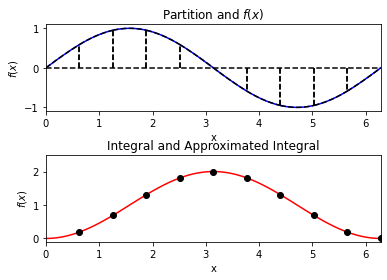

In [3]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i + 1])], 'k--')
    coeff = numpy.polyfit((x_hat[i], x_hat[i] + delta_x / 2.0, x_hat[i + 1]), 
                          (f(x_hat[i]), f(x_hat[i] + delta_x / 2.0), f(x_hat[i+1])), 2)
    x_star = numpy.linspace(x_hat[i], x_hat[i+1], 10)
    axes.plot(x_star, numpy.polyval(coeff, x_star), 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = delta_x * (1.0 / 6.0 * (f(x_hat[0]) + f(x_hat[1])) + 2.0 / 3.0 * f(x_hat[0] + delta_x / 2.0))
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + delta_x * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x / 2.0))
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

## Error Analysis
Define the error $E[f]$ such that

$$I[f] = I_n[f] + E_n[f]$$


### Quadrature Accuracy

We can use our polynomial analysis from before to analyze the error of quadrature methods.  From Lagrange's theorem:

$$R_N(x) = (x - x_0)(x - x_1) \cdots (x- x_N) \frac{f^{(N+1)}(c)}{(N+1)!}$$

and integrate it to find the form and magnitude of the error on a single interval.  

To find the total error we must sum the error over all the intervals:

$$I[f] = \sum_{i=0}^{n-1} \int^{x_{i+1}}_{x_i} P_N(x) dx + \sum_{i=0}^{n-1} \int^{x_{i+1}}_{x_i} R_N(x) dx = I_n[f] + E_n[f]$$

as we defined before.

#### Trapezoidal error

With $N=1$ we have

$$R_1(x) = (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2}$$

Integrating this leads to

$$\int^{x_{i+1}}_{x_i} (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2} dx = -\frac{\Delta x^3}{12} f''(c)$$

giving us a form for the error.  

If we sum up across all the intervals the total error is

$$E_n[f] = -\frac{\Delta x^3}{12} \sum_{i=0}^{n-1} f''(c_i)$$

or more illustrative

$$E_n[f] = -\frac{1}{12} \Delta x^2 (b - a) \left [ \frac{1}{n} \sum^{n-1}_{i=0} f''(c_i) \right ]$$

$$E_n[f] = -\frac{1}{12} \Delta x^2 (b - a)   f''(\xi) $$

where the expression in the brackets is the average value of the second derivative over the interval $[a,b]$.  This also shows that the trapezoidal rule converges quadratically as $\Delta x \rightarrow 0$.

#### Simpson's Rule Error

Similarly here we have $N = 2$ and 

$$R_2(x) = (x - x_i) (x - x_{i+1}) (x - x_{i+2}) \frac{f'''(c_i)}{3!}$$

Integrating and summing the error contributions we find

$$E_n[f] = -\frac{1}{180} (b - a) \Delta x^4 f^{(4)}(\xi)$$

Interestingly we have gained two orders of accuracy by increasing the polynomial degree to 2.

#### Midpoint Rule Error

$$ I_n[f] = \sum^{n-1}_{i=0} f\left(\frac{x_{i+1} + x_i}{2} \right ) (x_{i+1} - x_i) =  \frac{b-a}{n} \sum^{n-1}_{i=0} f\left(x_i^\star\right ),$$

$$ \Delta x f(x_i^\star) = \int_{x_i}^{x_{i+1}} \left(  f(x_i^\star)+ f'(x_i^\star) \left( x - x^\star_i \right) \right) \text{d}x, $$

$$
E_\Delta =  \int_{x_i}^{x_{i+1}} f(x) \text{d}x -  \frac{b-a}{n} f(x_i^\star)\\
=  \int_{x_i}^{x_{i+1}} R_1(x) \text{d}x  = \int_{x_i}^{x_{i+1}} \frac{(x-x^\star_i)^2}{2!} f''(c) \text{d}x
= \frac{(\Delta x)^3}{12 }, \\
E_n = \sum_n E_\Delta = \frac{(b-a)}{24} (\Delta x)^2 f''(\xi)
$$

| Method   |      Error                   |  Order |
|-----------|------------------------------|------|
|<img width=200/>|<img width=200/>|<img width=200/>|
| Midpoint  |  $\frac{1}{24}(b-a) (\Delta x)^2 |f''(\xi)|$ | 2 |
|Trapezoidal|     $\frac{1}{12}  (b - a) (\Delta x)^2 |f''(\xi)| $  |   2 |
| Simpson's |  $\frac{1}{180} (b - a) (\Delta x)^4 |f^{(4)}(\xi)|$ |    4 |

##### Example 1:

If $f(x) = \sin \pi x$ look at the relative accuracy of midpoint, trapezoidal and simpson's rules for a single interval $x\in[0,1]$.

$$\begin{aligned}
    \text{Exact:}  &I[f] = \int^1_0 \sin \pi x = \left . \frac{-\cos \pi x}{\pi} \right |^1_0 = \frac{2}{\pi} \approx 0.636619772 \\
    \text{Midpoint:}  &I_1[f] = \Delta x f(1/2) = \sin (\pi / 2) = 1 \\
    \text{Trapezoid:}  &I_1[f] = \frac{\Delta x}{2} (\sin(0) + \sin(\pi)) = 0 \\
    \text{Simpson's:}  &I_1[f] = \frac{\Delta x}{6} \sin(0) + \frac{2 \Delta x}{3} \sin(\pi / 2) + \frac{\Delta x}{6} \sin(\pi) = \frac{2 \Delta x}{3} = \frac{2}{3}
\end{aligned}$$

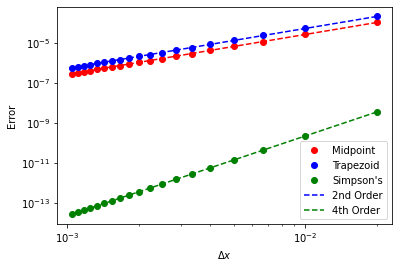

In [20]:
# Compute the error as a function of delta_x for each method
f = lambda x: numpy.sin(numpy.pi * x)

num_partitions = range(50, 1000, 50)
delta_x = numpy.empty(len(num_partitions))
error_mid = numpy.empty(len(num_partitions))
error_trap = numpy.empty(len(num_partitions))
error_simpson = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N + 1)
    delta_x[j] = x_hat[1] - x_hat[0]

    # Compute Midpoint
    x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
    I_hat = 0.0
    for i in range(0, N):
        I_hat += f(x_star[i]) * delta_x[j]
    error_mid[j] = numpy.abs(I_hat - 2.0 / numpy.pi)
    
    # Compute trapezoid
    I_hat = 0.0
    for i in range(0, N):
        I_hat += (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x[j] / 2.0
    error_trap[j] = numpy.abs(I_hat - 2.0 / numpy.pi)
    
    # Compute simpson's    
    I_hat = 0.0
    for i in range(0, N):
        I_hat += delta_x[j] * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x[j] / 2.0))
    error_simpson[j] = numpy.abs(I_hat - 2.0 / numpy.pi)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, error_mid, 'ro', label="Midpoint")
axes.loglog(delta_x, error_trap, 'bo', label="Trapezoid")
axes.loglog(delta_x, error_simpson, 'go', label="Simpson's")
axes.loglog(delta_x, order_C(delta_x[0], error_trap[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error_simpson[0], 4.0) * delta_x**4.0, 'g--', label="4th Order")
axes.legend(loc=4)
axes.loglog(delta_x, order_C(delta_x[0], error_mid[0], 2.0) * delta_x**2.0, 'r--')
plt.xlabel('$\Delta x$')
plt.ylabel(')
plt.show()

In [15]:
error_mid/error_trap

array([0.50002468, 0.50000617, 0.50000274, 0.50000154, 0.50000099,
       0.50000069, 0.5000005 , 0.50000039, 0.5000003 , 0.50000025,
       0.5000002 , 0.50000017, 0.50000015, 0.50000012, 0.50000011,
       0.50000009, 0.50000008, 0.50000007, 0.50000007])

### Degree of exactness

$$\max_d  \qquad \text{such that} \qquad E_n[f] = 0, \qquad f \in \mathbb{P}_d \quad $$ 

So for interpolatory formulas we have seen so far, using $N$ points:

$$\sum_{k=1}^{N} w_k f(x_k) = \int_a^b P_{N-1}(x) \text{d}x = \int_a^b \sum_{j=1}^{N} \ell_j(x) f(x_j) \,  \text{d}x, $$
$$ w_k = \int_a^b \ell_k(x) \text{d}x, \qquad \ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j}. $$

Using interpolatory formulas we can get up to degree $d = N-1$ of exactness. Can we do better?


$$\sum_{k=1}^{N} w_k w(x) f(x_k) = \int_a^b w(x) f(x) \text{d}x = \int_a^b w(x) \sum_{j=1}^{N} \ell_j(x) f(x_j) \,  \text{d}x, $$
$$ w_k = \int_a^b w(x) \ell_k(x) \text{d}x, \qquad \ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j} = \frac{\omega(x)}{x_i - x_j} $$

### Generalized Gaussian Quadrature

Recall :
$$
    <x, y> = \sum^N_{i=1} x_i y_i = ||x|| \cdot ||y|| \cos \theta,\\
    \int^1_{-1} w(x) f(x) g(x) dx = 0
$$

Assume we have an orthogonal basis with weight $\omega(x)$: 

$$
p(x) = q(x) \omega(x) + r(x), \qquad q \in \mathbb{P}_{N-1}, \quad r \in \mathbb{P}_{N-1},\\
\int^1_{-1} p(x) \,\text{d}x = \int^1_{-1} q(x)\omega(x) \,\text{d}x +  \int^1_{-1} r(x) \,\text{d}x, \\
\int^1_{-1} p(x)\,\text{d}x  = \sum w_k r(x_k) = \sum w_k (p(x_k - q(x_k) \omega(x_k)) = \sum w_k p(x_k)
$$

Given $g(x) \in P_N(x)$ with roots $\{x_i\}^N_{i=1}$ we have
$$
    \int^1_{-1} x^i g(x) dx = 0 \quad \forall i < N,
$$
i.e. $g(x)$ is orthogonal to the $x^i$ with respect to the weight function $w(x)$.

If $<x, y> = 0$ then the vectors $x$ and $y$ are orthogonal.

Given the above $g(x)$ there then exists $\{w_i\}$ such that

$$\int^1_{-1}  P_j(x) dx = \sum^N_{i=1} w_i P_j(x_i) \quad \forall j \leq 2 N - 1$$

In other words, given a polynomial basis function and weight and orthogonality to all polynomials of order $i < N$ we can exactly integrate polynomials of order $2 N - 1$.  Choosing the correct weighting function and basis leads to a number of useful quadrature approaches:

##### Example 2:  2-Point Gauss-Legendre Quadrature

Let $N=2$ on $x \in [-1,1]$

$$I_\Delta[f] = w_0 f(x_0) + w_1 f(x_1)$$

Using undetermined coefficients again we have

$$\begin{aligned}
    &\text{if}~f = 1:  &I[f] =  \int^{1}_{-1} 1 dx = 2 & & I_2[1] &= w_0 + w_1\\
    &\text{if}~f = x:  &I[f] =  \int^{1}_{-1} x dx = 0 & & I_2[x] &= w_0 x_0 + w_1 x_1\\
    &\text{if}~f = x^2:  &I[f] =  \int^{1}_{-1} x^2 dx = \frac{2}{3} & & I_2[x^2] &= w_0 x_0^2 + w_1 x_1^2\\
    &\text{if}~f = x^3:  &I[f] =  \int^{1}_{-1} x^3 dx = 0 & & I_2[x^3] &= w_0 x_0^3 + w_1 x_1^3\\
\end{aligned}$$

$$\begin{aligned}
    &w_0 + w_1 = 2\\
    &w_0 x_0 + w_1 x_1 = 0\\
    &w_0 x_0^2 + w_1 x_1^2 = \frac{2}{3}\\
    &w_0 x_0^3 + w_1 x_1^3 = 0\\
\end{aligned}$$

Note that we need to solve for 4 unknowns $x_0$, $x_1$, $w_0$, and $w_1$.  Solving these equations leads to

$$x_0 = -\sqrt{\frac{1}{3}}, x_1 = \sqrt{\frac{1}{3}}  \quad \text{and} \quad w_0 = w_1 = 1 $$

The first few rules yield

<table width="80%">
    <tr align="center"><th>$$N$$</th> <th align="center">$$x_i$$</th> <th align="center"> $$w_i$$ </th></tr>
    <tr align="center"><td>$$1$$</td>           <td> $$0$$ </td> <td> $$2$$ </td> </tr>
    <tr align="center"><td>$$2$$</td>           <td> $$\pm \sqrt{\frac{1}{3}}$$ </td> <td> $$1$$ </td> </tr>
    <tr align="center"><td rowspan=2>$$3$$</td> <td> $$0$$ </td> <td> $$8/9$$ </td> </tr>
    <tr align="center">                     <td> $$\pm \sqrt{\frac{3}{5}}$$ </td> <td> $$5/9$$</td> </tr>
    <tr align="center"><td rowspan=2>$$4$$</td> <td> $$\pm \sqrt{\frac{3}{7} - \frac{2}{7} \sqrt{\frac{6}{5}}}$$</td> <td> $$\frac{18 + \sqrt{30}}{36}$$ </td> </tr>
    <tr align="center">                     <td> $$\pm \sqrt{\frac{3}{7} + \frac{2}{7} \sqrt{\frac{6}{5}}}$$</td> <td>$$\frac{18 - \sqrt{30}}{36}$$ </td> </tr>
    <tr align="center"><td rowspan=3>$$5$$</td> <td> $$0$$ </td> <td> $$\frac{128}{225}$$ </td> </tr>
    <tr align="center">                     <td> $$\pm \frac{1}{3} \sqrt{5 - 2 \sqrt{\frac{10}{7}}}$$</td> <td> $$\frac{322 + 13\sqrt{70}}{900}$$</td> </tr>
    <tr align="center">                     <td> $$\pm \frac{1}{3} \sqrt{5 + 2 \sqrt{\frac{10}{7}}}$$</td> <td> $$\frac{322 - 13\sqrt{70}}{900}$$</td> </tr>
</table>

### Arbitrary Intervals (Affine Transforms)

Mapping $\xi \in [-1,1] \rightarrow x \in [a,b]$ can be done through an *affine transform* or *affine map* which is a linear transformation.

$$x = \underbrace{\frac{b - a}{2}}_{\text{scaling}} \xi + \underbrace{\frac{a+b}{2}}_{\text{translation}} ~~~~~ \text{or} ~~~~~ \xi = \left( x - \frac{a + b}{2}\right) \frac{2}{b-a}$$

$$\begin{aligned}
    I[f] &= \int^b_a f(x) dx = \int^1_{-1} f(x(\xi)) \frac{dx}{d\xi} d\xi = \frac{b - a}{2} \int^1_{-1} f(x(\xi)) d\xi\\
    I_N[f] &= \sum_i w_i f(x(\xi_i)) \left . \frac{dx}{d\xi}\right|_{\xi_i}
\end{aligned}$$

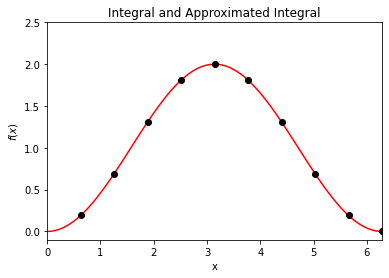

In [3]:
# Compute Gauss-Legendre based quadrature and affine transforms
f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
xi_0 = -numpy.sqrt(1.0 / 3.0)
xi_1 =  numpy.sqrt(1.0 / 3.0)
I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = (f(xi_map(x_hat[0], x_hat[1], xi_0)) + f(xi_map(x_hat[0], x_hat[1], xi_1))) * delta_x / 2.0
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + (f(xi_map(x_hat[i], x_hat[i+1], xi_0)) + ...
                               f(xi_map(x_hat[i], x_hat[i+1], xi_1))) * delta_x / 2.0
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

#### Other Quadrature Families

 - Clenshaw-Curtis (Gauss-Chebyshev): If $w(x) = \frac{1}{\sqrt{1 - x^2}}$ and $g(x)$ are Chebyshev polynomials then we know the roots of the polynomials to be $x_i = \cos\left(\frac{2i-1}{2N} \pi \right)$ (the Chebyshev nodes) and we can derive that $w_i = \frac{\pi}{N}$.
 - Gauss-Hermite:  If $w(x) = e^{-x^2}$ and $g(x)$ are Hermite polynomials $H_i(x)$ then
   $$w_i = \frac{2^{N-1} N! \sqrt{\pi}}{N^2 (H_{N-1}(x_i))^2}$$

##### Example 3:

If $f(x) = e^x$ look at the relative accuracy of midpoint, trapezoidal, Simpson's and 2-point Gauss-Legendre quadrature for a single interval $x \in [-1,1]$.

$$\begin{aligned}
    \text{Exact:} &I[f] = \int^1_{-1} e^x = \left . e^x \right |^1_{-1} = e - \frac{1}{e} \approx 2.350402387 \\
    \text{Midpoint:} &I_2[f] = 2 e^0 = 2 \\
    \text{Trapezoid:} &I_2[f] = \frac{2}{2} (e^{-1} + e^1) = e + \frac{1}{e} = 3.08616127 \\
    \text{Simpson's:} &I_2[f] = \frac{2}{6} e^{-1} + \frac{4}{3} e^0 + \frac{2}{6} e^1 = \frac{4}{3} + \frac{1}{3} (e^{-1} + e^1) \approx 2.362053757 \\
    \text{Gauss-Legendre:} &I_2[f] = e^{-\sqrt{\frac{1}{3}}} + e^{\sqrt{\frac{1}{3}}} \approx 2.342696088
\end{aligned}$$

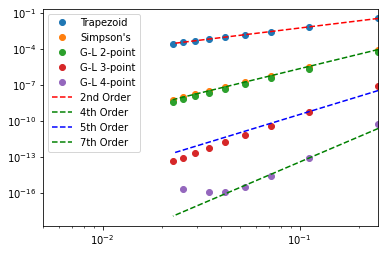

In [7]:
# Compute the error as a function of delta_x for each method
f = lambda x: numpy.sin(numpy.pi * x)
I = 2.0 / numpy.pi

# num_partitions = range(50, 1000, 50)
num_partitions = range(5, 50, 5)
delta_x = numpy.empty(len(num_partitions))
error_trap = numpy.empty(len(num_partitions))
error_simpson = numpy.empty(len(num_partitions))
error_2 = numpy.empty(len(num_partitions))
error_3 = numpy.empty(len(num_partitions))
error_4 = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N)
    delta_x[j] = x_hat[1] - x_hat[0]
    
    # Compute trapezoid
    I_hat = 0.0
    for i in range(0, N - 1):
        I_hat += (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x[j] / 2.0
    error_trap[j] = numpy.abs(I_hat - I)
    
    # Compute simpson's    
    I_hat = 0.0
    for i in range(0, N - 1):
        I_hat += delta_x[j] * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + ...
                               2.0 / 3.0 * f(x_hat[i] + delta_x[j] / 2.0))
    error_simpson[j] = numpy.abs(I_hat - I)
    
    # Compute Gauss-Legendre 2-point
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(1.0 / 3.0), numpy.sqrt(1.0 / 3.0)]
    w = [1.0, 1.0]
    I_hat = 0.0
    for i in range(0, N - 1):
        for k in range(len(xi)):
            I_hat += f(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    I_hat *= delta_x[j] / 2.0
    error_2[j] = numpy.abs(I_hat - I)
    
    # Compute Gauss-Legendre 3-point
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(3.0 / 5.0), 0.0, numpy.sqrt(3.0 / 5.0)]
    w = [5.0 / 9.0, 8.0 / 9.0, 5.0 / 9.0]
    I_hat = 0.0
    for i in range(0, N - 1):
        for k in range(len(xi)):
            I_hat += f(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    I_hat *= delta_x[j] / 2.0
    error_3[j] = numpy.abs(I_hat - I)
    
    # Compute Gauss-Legendre 4-point
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)), 
           numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
          -numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
           numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0))]
    w = [(18.0 + numpy.sqrt(30.0)) / 36.0, (18.0 + numpy.sqrt(30.0)) / 36.0,
         (18.0 - numpy.sqrt(30.0)) / 36.0, (18.0 - numpy.sqrt(30.0)) / 36.0]
    I_hat = 0.0
    for i in range(0, N - 1):
        for k in range(len(xi)):
            I_hat += f(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    I_hat *= delta_x[j] / 2.0
    error_4[j] = numpy.abs(I_hat - I)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

# axes.plot(delta_x, error)
axes.loglog(delta_x, error_trap, 'o', label="Trapezoid")
axes.loglog(delta_x, error_simpson, 'o', label="Simpson's")
axes.loglog(delta_x, error_2, 'o', label="G-L 2-point")
axes.loglog(delta_x, error_3, 'o', label="G-L 3-point")
axes.loglog(delta_x, error_4, 'o', label="G-L 4-point")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error_trap[0], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error_simpson[0], 4.0) * delta_x**4.0, 'g--', label="4th Order")
axes.loglog(delta_x, order_C(delta_x[1], error_3[1], 5) * delta_x**5, 'b--', label="5th Order")
axes.loglog(delta_x, order_C(delta_x[1], error_4[1], 7.0) * delta_x**7.0, 'g--', label="7th Order")

axes.legend(loc=2)
axes.set_xlim((5e-3, delta_x[0]))

plt.show()